In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pydotplus
from IPython.display import Image

In [3]:
dataset=pd.read_csv('/content/Titanic.csv')
dataset.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
dataset.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Survived', ylabel='Age'>

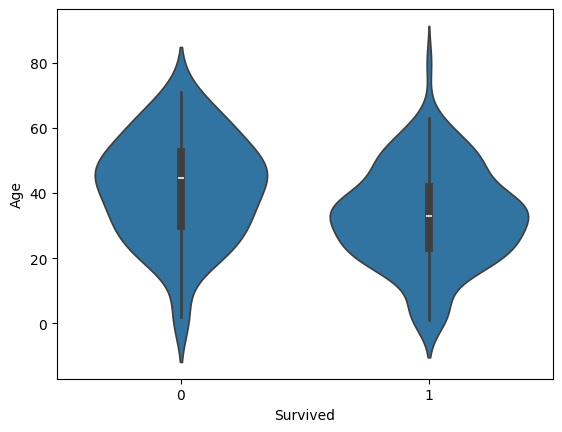

In [5]:
dataset = dataset.dropna()
sns.violinplot(x ='Survived', y ='Age', data = dataset)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:,5].to_numpy(),
                                                    dataset.iloc[:,1].to_numpy(), train_size = 0.75 )

In [7]:
modelo = LogisticRegression()
modelo_entrenado = modelo.fit(X_train.reshape(-1,1),y_train)
y_pred = modelo_entrenado.predict(X_test.reshape(-1, 1))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 3, 13],
       [ 0, 30]])

Text(0.5, 23.52222222222222, 'Valor Predecido')

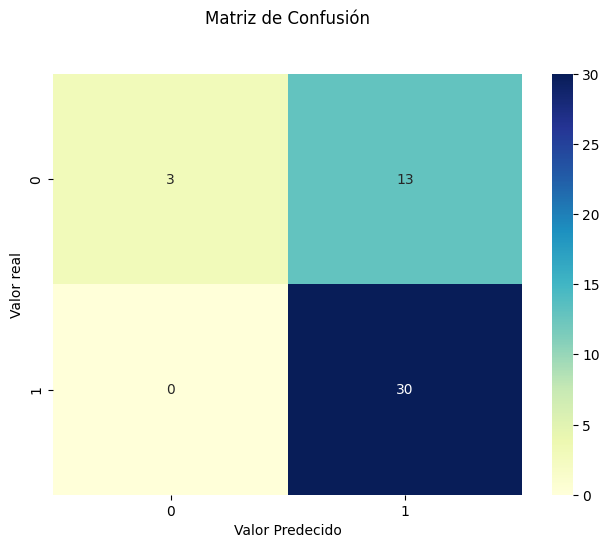

In [8]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu",fmt='g')
plt.tight_layout()
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valor real')
plt.xlabel('Valor Predecido')

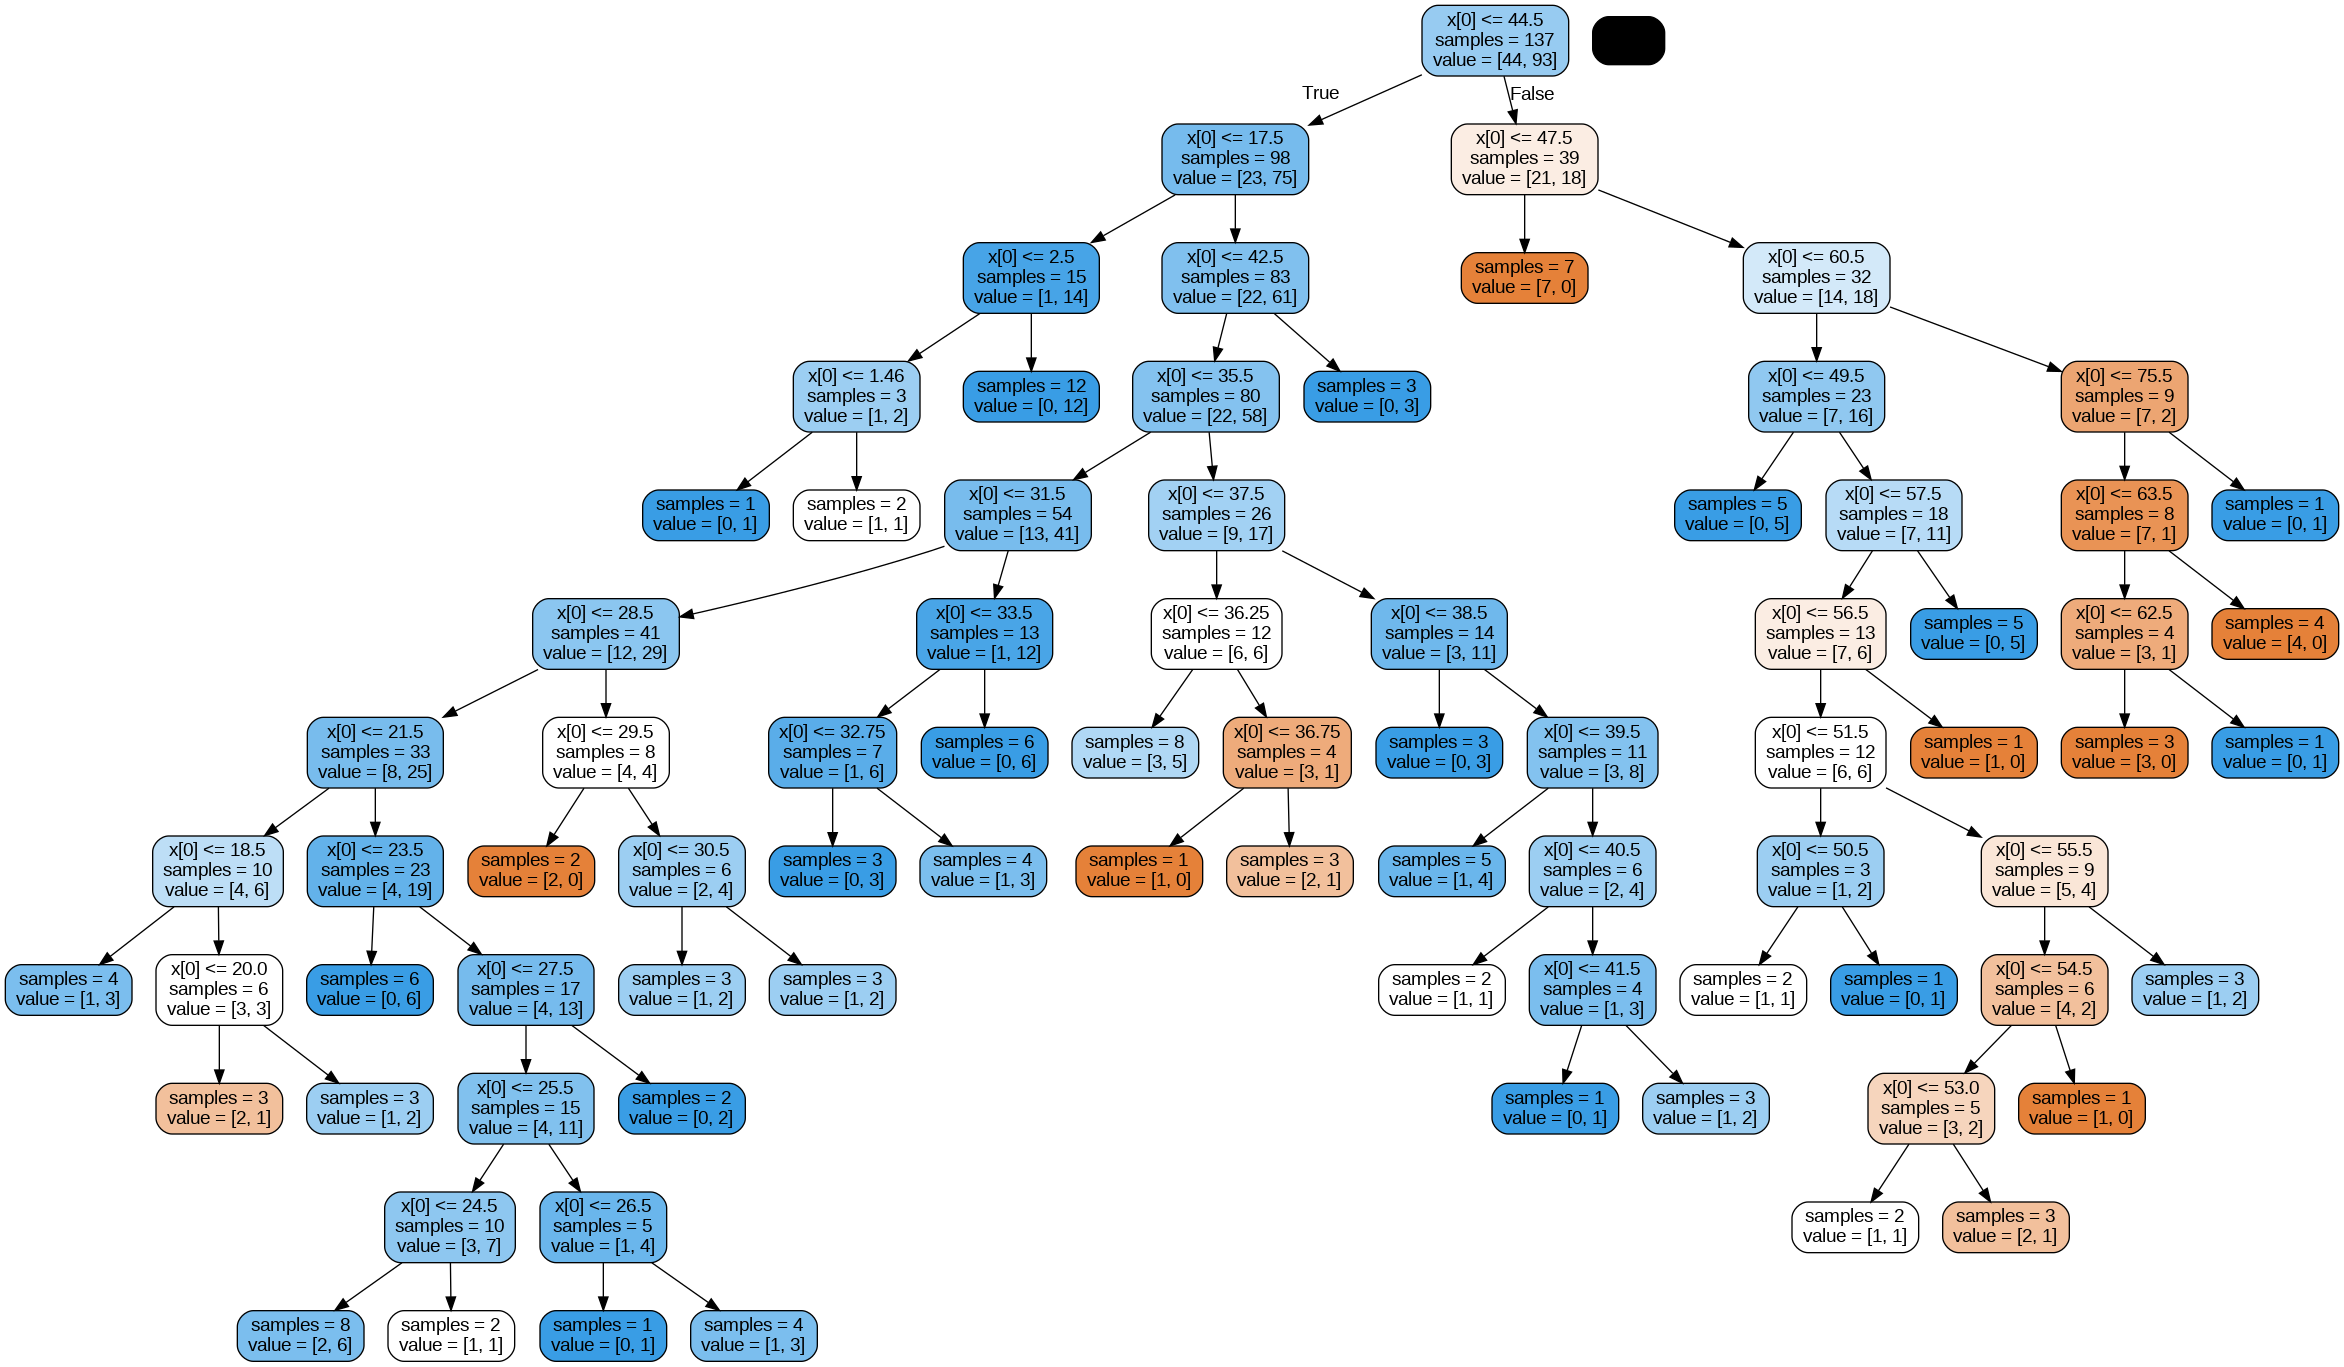

In [9]:
arbol=DecisionTreeClassifier() #si se desea limi tar es con max_ depth=4 [este ejemplo dice que solo los primeros 4]
arbol_enfermedad=arbol.fit (X_train.reshape(-1, 1),y_train.reshape(-1 ,1))
# create DOT data
dot_data = tree.export_graphviz(arbol_enfermedad,out_file=None,
                                filled=True, rounded=True,special_characters=False,impurity=False)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [11]:
modelo_reglog = LogisticRegression()
modelo_entrenado = modelo_reglog.fit(X_train.reshape(-1,1),y_train)
modelo_entrenado.coef_
y_pred = modelo_entrenado.predict (X_test.reshape(-1,1))
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 3, 13],
       [ 0, 30]])

Text(0.5, 23.52222222222222, 'Valor Predecido')

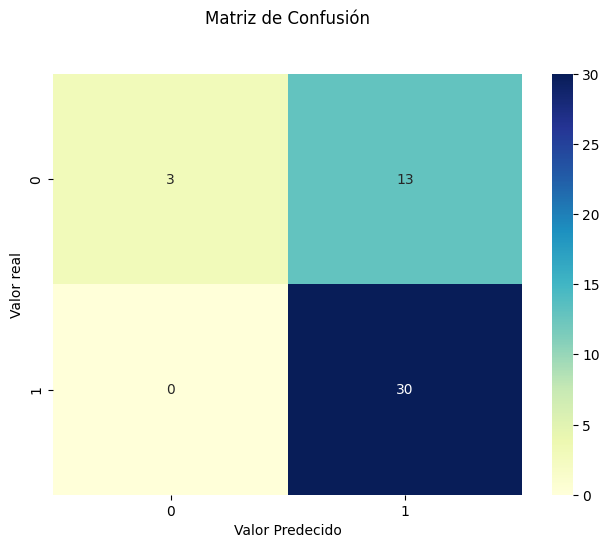

In [12]:
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu",fmt='g')
plt.tight_layout()
plt.title('Matriz de Confusión', y=1.1)
plt.ylabel('Valor real')
plt.xlabel('Valor Predecido')